<a href="https://colab.research.google.com/github/kousikreddy-04/Stock-market/blob/main/Stockmarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# data collection

In [15]:
import pandas as pd
import seaborn as sns

In [3]:
import yfinance as yf

# Define the stock symbols
stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']

# Download historical data
data = yf.download(stocks, start='2020-01-01', end='2023-01-01')['Close']


/tmp/ipython-input-2766632649.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stocks, start='2020-01-01', end='2023-01-01')['Close']
[*********************100%***********************]  4 of 4 completed


# data preprocessing

In [4]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values with the previous day's closing price
data.fillna(method='ffill', inplace=True)



Ticker
AAPL     0
AMZN     0
GOOGL    0
MSFT     0
dtype: int64


/tmp/ipython-input-3198542352.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)



# data visualization


4.1 Stock Prices Over time

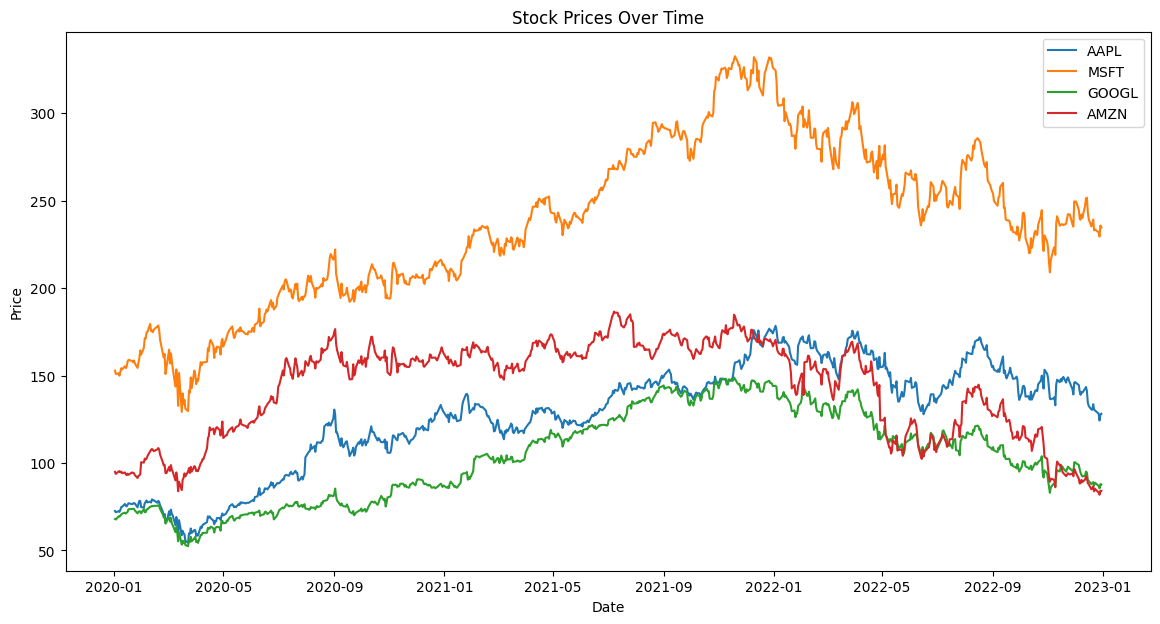

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
for stock in stocks:
    plt.plot(data[stock], label=stock)
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


4.2 Daily Returns Distribution


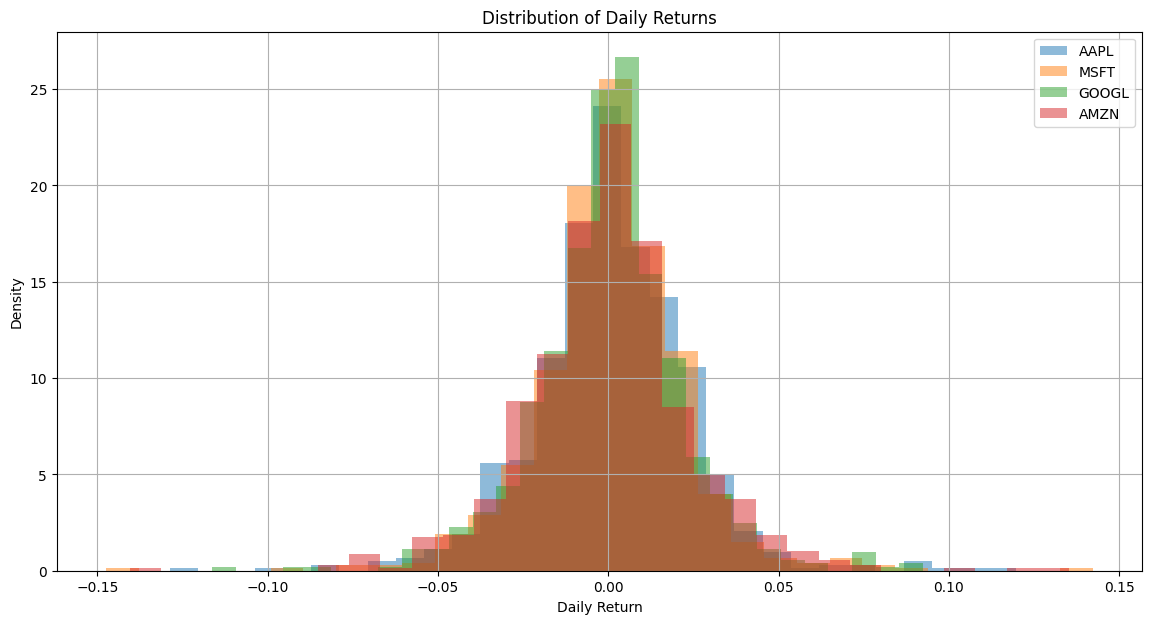

In [11]:
plt.figure(figsize=(14, 7))
for stock in stocks:
    plt.hist(price_change[stock], bins=30, alpha=0.5, label=stock, density=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()


 4.3 Cumulative Returns

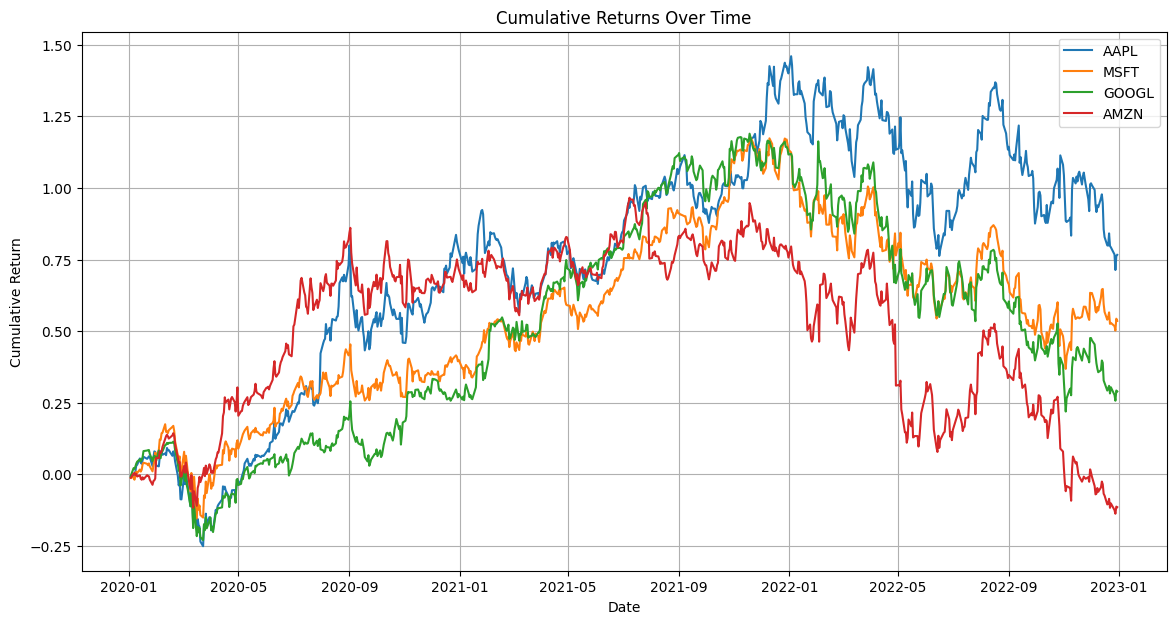

In [12]:
cumulative_returns = (1 + price_change).cumprod() - 1

plt.figure(figsize=(14, 7))
for stock in stocks:
    plt.plot(cumulative_returns[stock], label=stock)
plt.title('Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid()
plt.show()


4.4 Box Plot of Daily Returns


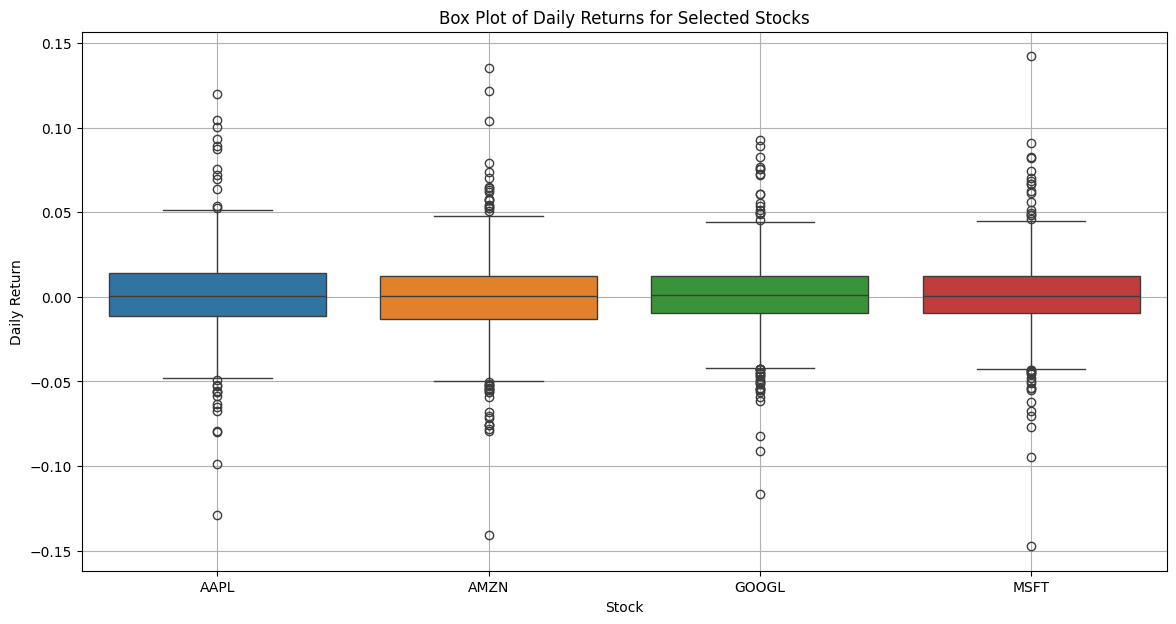

In [16]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=price_change)
plt.title('Box Plot of Daily Returns for Selected Stocks')
plt.xlabel('Stock')
plt.ylabel('Daily Return')
plt.grid()
plt.show()


 4.5 scatter Plot of Returns


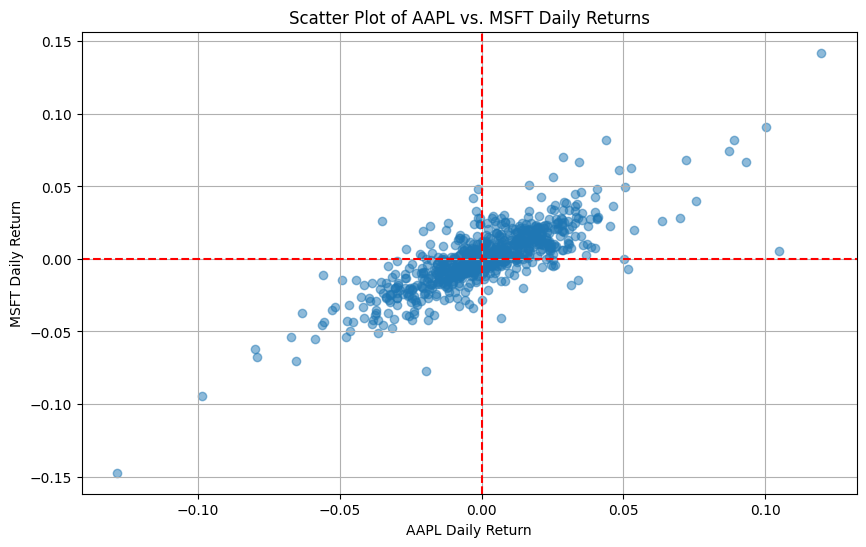

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(price_change['AAPL'], price_change['MSFT'], alpha=0.5)
plt.title('Scatter Plot of AAPL vs. MSFT Daily Returns')
plt.xlabel('AAPL Daily Return')
plt.ylabel('MSFT Daily Return')
plt.grid()
plt.axhline(0, color='red', linestyle='--')
plt.axvline(0, color='red', linestyle='--')
plt.show()


# Stock Analysis


5.1 Price Change Over Time


In [10]:
price_change = data.pct_change().dropna()
print(price_change)


Ticker          AAPL      AMZN     GOOGL      MSFT
Date                                              
2020-01-03 -0.009722 -0.012139 -0.005231 -0.012452
2020-01-06  0.007968  0.014886  0.026654  0.002585
2020-01-07 -0.004703  0.002092 -0.001932 -0.009118
2020-01-08  0.016086 -0.007809  0.007118  0.015928
2020-01-09  0.021241  0.004799  0.010498  0.012493
...              ...       ...       ...       ...
2022-12-23 -0.002798  0.017425  0.016750  0.002267
2022-12-27 -0.013878 -0.025924 -0.020621 -0.007414
2022-12-28 -0.030685 -0.014692 -0.015677 -0.010255
2022-12-29  0.028324  0.028844  0.028249  0.027630
2022-12-30  0.002469 -0.002138 -0.002487 -0.004938

[755 rows x 4 columns]


5.2 Daily Return Calculation


In [17]:
average_daily_return = price_change.mean()
print("Average Daily Return:\n", average_daily_return)


Average Daily Return:
 Ticker
AAPL     0.001024
AMZN     0.000141
GOOGL    0.000573
MSFT     0.000808
dtype: float64


5.3 Moving Average Calculation


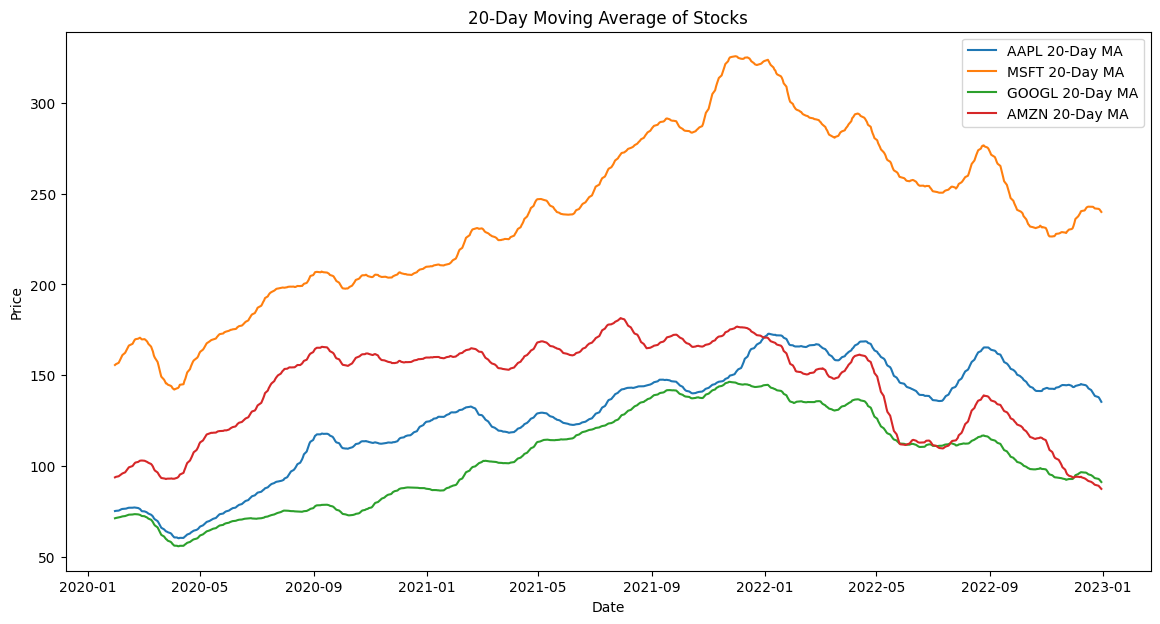

In [18]:
moving_average = data.rolling(window=20).mean()
plt.figure(figsize=(14, 7))
for stock in stocks:
    plt.plot(moving_average[stock], label=f'{stock} 20-Day MA')
plt.title('20-Day Moving Average of Stocks')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


5.4 Correlation Analysis


Correlation Matrix:
 Ticker      AAPL      AMZN     GOOGL      MSFT
Ticker                                        
AAPL    1.000000  0.663193  0.730438  0.811363
AMZN    0.663193  1.000000  0.679468  0.701370
GOOGL   0.730438  0.679468  1.000000  0.830213
MSFT    0.811363  0.701370  0.830213  1.000000


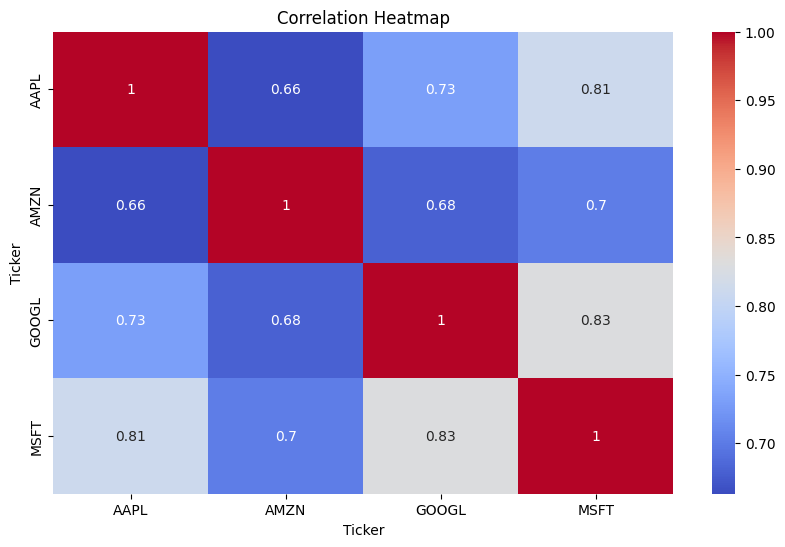

In [19]:
correlation_matrix = price_change.corr()
print("Correlation Matrix:\n", correlation_matrix)

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


5.5 Value at Risk (VaR)

In [20]:
VaR_95 = price_change.quantile(0.05)
print("Value at Risk (95%):\n", VaR_95)


Value at Risk (95%):
 Ticker
AAPL    -0.034843
AMZN    -0.037092
GOOGL   -0.035324
MSFT    -0.033385
Name: 0.05, dtype: float64


# ARIMA Model for Prediction

6.1 Model Selection


In [21]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['AAPL'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -1.8889077720010257
p-value: 0.3372971020301757


6.2 Model Fitting


In [22]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['AAPL'], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  756
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1828.303
Date:                Sun, 31 Aug 2025   AIC                           3662.606
Time:                        08:27:45   BIC                           3676.486
Sample:                             0   HQIC                          3667.953
                                - 756                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3950      0.371      1.066      0.287      -0.331       1.121
ma.L1         -0.4596      0.362     -1.270      0.204      -1.169       0.250
sigma2         7.4278      0.298     24.936      0.0

6.3 Forecasting

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


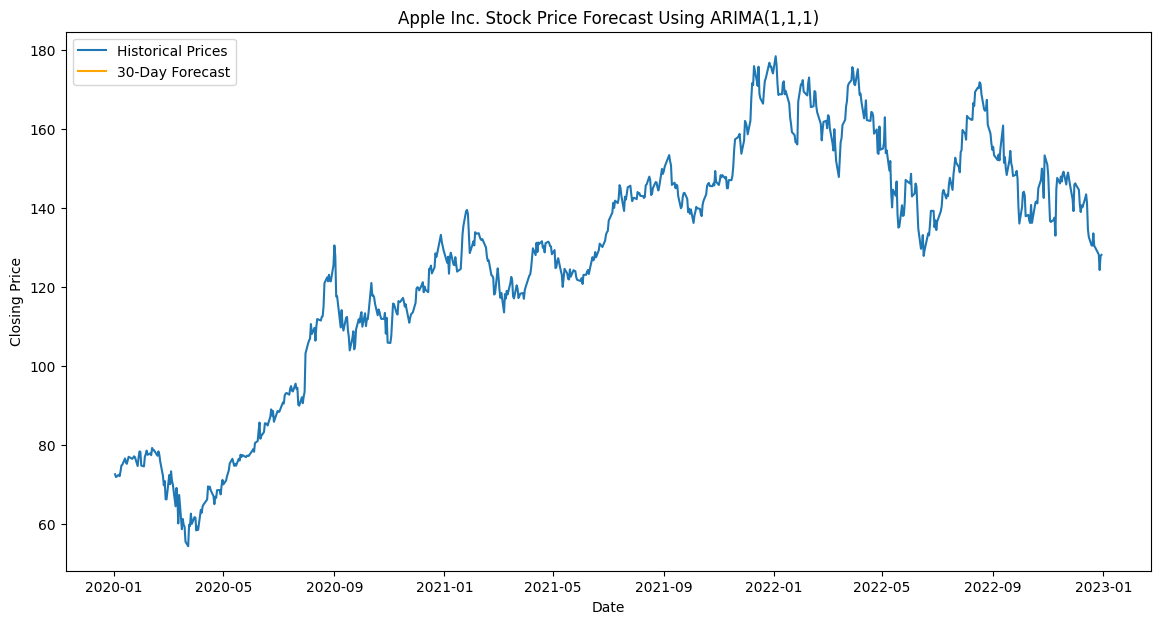

In [23]:
forecast = model_fit.forecast(steps=30)
forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')
forecast_series = pd.Series(forecast, index=forecast_index)
plt.figure(figsize=(14, 7))
plt.plot(data['AAPL'], label='Historical Prices')
plt.plot(forecast_series, label='30-Day Forecast', color='orange')
plt.title('Apple Inc. Stock Price Forecast Using ARIMA(1,1,1)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()



# Evaluation of Predictions


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd

# Example forecasted prices for the next 30 days (replace with your actual forecast)
forecast_values = [150.0, 151.5, 152.3, 153.0, 154.0, 154.8, 155.5, 156.2, 157.0, 157.8,
                   158.5, 159.0, 159.8, 160.3, 160.9, 161.5, 162.0, 162.7, 163.2, 163.8,
                   164.5, 165.0, 165.7, 166.2, 166.7, 167.4, 168.0, 168.5, 169.0, 169.5]

# Create a date range index (business days) for these 30 days
forecast_index = pd.date_range(start='2023-01-02', periods=30, freq='B')

# Create a pandas Series for the forecast
forecast_series = pd.Series(forecast_values, index=forecast_index)

# Example actual observed prices for the same period (replace with actual observed data)
actual_prices_values = [149.5, 151.0, 152.0, 153.5, 153.8, 155.0, 155.3, 156.8, 156.5, 157.3,
                        158.0, 159.2, 159.0, 160.5, 160.7, 161.2, 162.2, 162.5, 163.0, 164.0,
                        164.7, 165.3, 165.5, 166.0, 166.5, 167.0, 168.2, 168.0, 168.7, 170.0]

# Convert to pandas Series with same index as forecast
actual_prices = pd.Series(actual_prices_values, index=forecast_index)

# Calculate MAE and RMSE
mae = mean_absolute_error(actual_prices, forecast_series)
rmse = mean_squared_error(actual_prices, forecast_series) ** 0.5

print(f'Mean Absolute Error: {mae:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')


Mean Absolute Error: 0.3333
Root Mean Squared Error: 0.3706
